# Tutorial3: Trained embedding
This tutorial provides an example of identifying spatial domain using trained embedding in the paper.

## Mouse olfactory bulb
Taking stereo-seq sequencing technology as an example.

### Load Data
The emdedding is trained from RNA-seq data without cell type proportion data.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import scanpy as sc
import numpy as np
import DisConST
data = np.load(f'./embedding/MOB/mob_stereo.npy')
adata = sc.read_h5ad('./Data/MOB/mob_Stereo-seq.h5ad')
adata.obsm['STgene']=data

### Clustering

In [5]:
from sklearn.metrics import adjusted_rand_score as ari_score
DisConST.mclust_R(adata, num_cluster=8, used_obsm='STgene', domain_obs='gene_label')
ari=ari_score(adata.obs['cluster'], adata.obs['gene_label'])
ari

fitting ...
  |======================================================================| 100%


0.5788609134605577

### Visualization

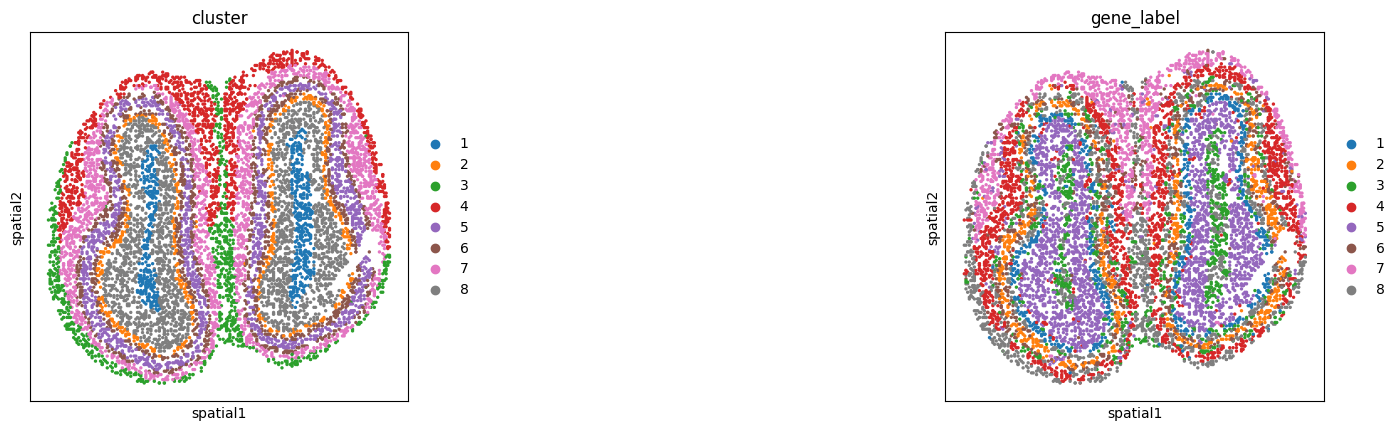

In [10]:
sc.pl.spatial(adata,img_key=None, color=['cluster','gene_label'], ncols=2, frameon=True,wspace=0.5)

## Mouse brain
Taking *Section 1 Sagittal Anterior* as an example.

In [10]:
adata = sc.read('./Data/MBS/Mouse_Brain_Serial_Section_1_Sagittal-Anterior_10xvisium_processed.h5ad')
data = np.load(f'./embedding/MBS/MBSAnt1.npy')
adata.obsm['STboth']=data
from sklearn.metrics import adjusted_rand_score as ari_score
DisConST.mclust_R(adata, num_cluster=20, used_obsm='STboth', domain_obs='both_label')
ari_b=ari_score(adata.obs['clusters'], adata.obs['both_label'])
ari_b

fitting ...
  |======================================================================| 100%


0.5837473123710363

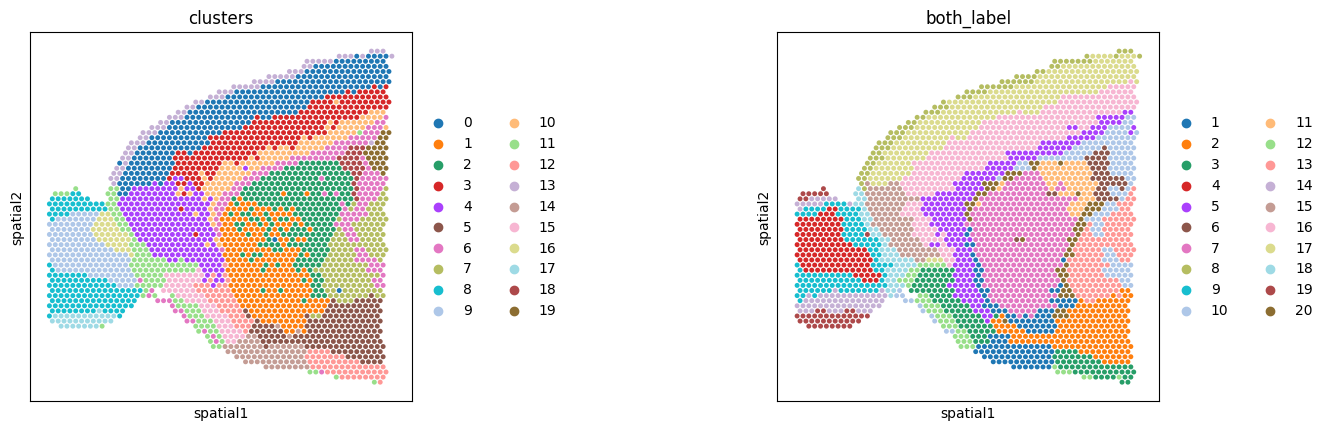

In [13]:
sc.pl.spatial(adata,img_key=None, color=['clusters','both_label'],size=1.3, ncols=2, frameon=True,wspace=0.3)

## Breast cancer

In [5]:
data = np.load('./embedding/breast_cancer/breast_cancer.npy')
adata = sc.read_h5ad('./Data/breast_cancer/human_breast_cancer.h5ad')
adata.obsm['STboth']=data
from sklearn.metrics import adjusted_rand_score as ari_score
DisConST.mclust_R(adata, num_cluster=20, used_obsm='STboth', domain_obs='both_label')
ari_b=ari_score(adata.obs['cluster'], adata.obs['both_label'])
adata=DisConST.utils.refine_label(adata, key='both_label')
ari_ref=ari_score(adata.obs['cluster'], adata.obs['ref_label'])
ari_ref

fitting ...
  |======================================================================| 100%


0.6200501480260756

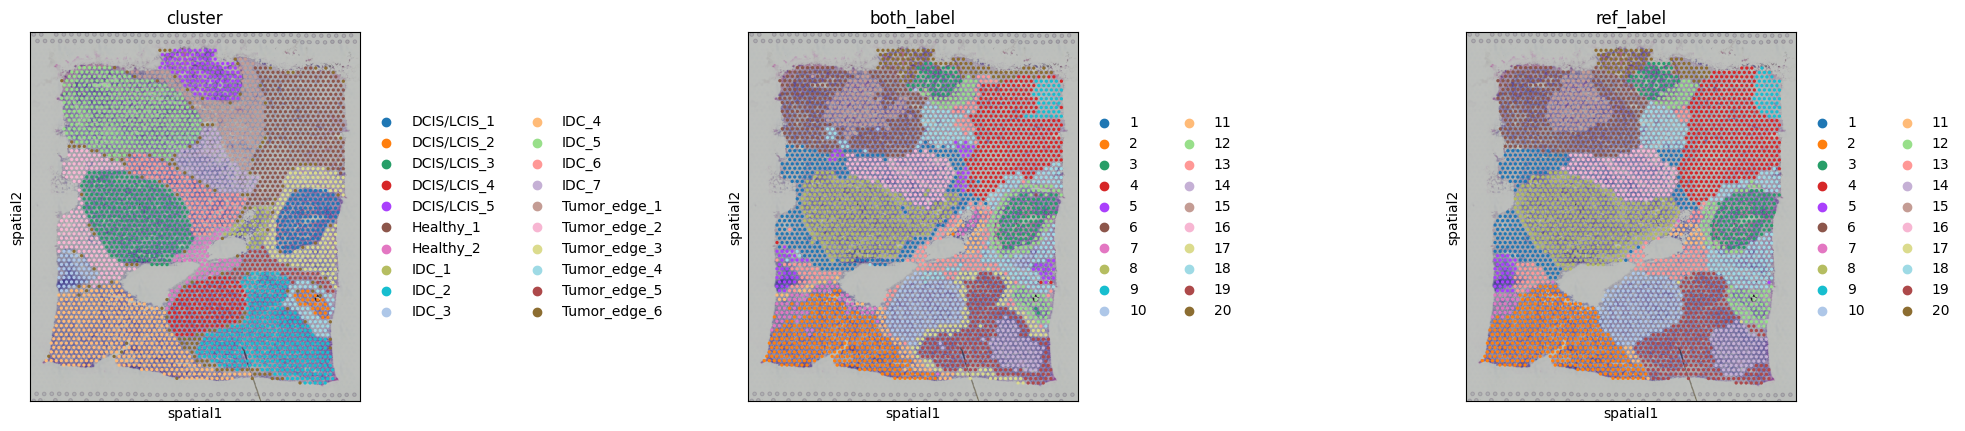

In [7]:
sc.pl.spatial(adata, color=['cluster','both_label','ref_label'], ncols=3, frameon=True,wspace=0.3)